## NLP y Visualizaciones @Infonavit

### 1. Objetivos:
    - Aprender qué visualizaciones podemos realizar de nuestros procesamientos de lenguaje natural
 
---
    
### 2. Desarrollo:

In [61]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [62]:
df = pd.read_csv('../Prototype/tweets_Infonavit.csv')

df.head()

,texts_Infonavit
0,conferenciapresidenteel director del infonavit...
1,este ano infonavit ha entregadomil creditos pa...
2,este ano infonavit ha entregadomil creditos pa...
3,en la conferencia matutina el secretario meyer...
4,atendemos el rezago de vivienda producto del n...


In [63]:
es_stop_words = ['de', 'el', 'que', 'la', 'en', 'los', 'para', 'del', 'con', 'a', 'y', 'no', 'por', 'se', 'es', 'una', 'un',
                'me', 'mi', 'las', 'al', 'si', 'mas', 'tu', 'como', 'ya', 'lo', 'su', 'te', 'esta', 'o', 'donde', 'cuando',
                'tengo', 'pero', 'ha', 'sin', 'son', 'les', 'yo', 'tus', 'todos', 'nos', 'sobre', 'este', 'esto', 'hola',
                'sus', 'han', 'estan', 'cual', 'carlosmartinezv', 'meyerfalcon', 'davidrcervantes', 'hdmauleon', 'martinez',
                'agapito', 'gracias', 'hoy', 'dia', 'hay', 'dst', 'ednaelenavegar', 'hdemauleon', 'velazquez', 'e', 'ni', 'le']
es_stop_words

['de',
 'el',
 'que',
 'la',
 'en',
 'los',
 'para',
 'del',
 'con',
 'a',
 'y',
 'no',
 'por',
 'se',
 'es',
 'una',
 'un',
 'me',
 'mi',
 'las',
 'al',
 'si',
 'mas',
 'tu',
 'como',
 'ya',
 'lo',
 'su',
 'te',
 'esta',
 'o',
 'donde',
 'cuando',
 'tengo',
 'pero',
 'ha',
 'sin',
 'son',
 'les',
 'yo',
 'tus',
 'todos',
 'nos',
 'sobre',
 'este',
 'esto',
 'hola',
 'sus',
 'han',
 'estan',
 'cual',
 'carlosmartinezv',
 'meyerfalcon',
 'davidrcervantes',
 'hdmauleon',
 'martinez',
 'agapito',
 'gracias',
 'hoy',
 'dia',
 'hay',
 'dst',
 'ednaelenavegar',
 'hdemauleon',
 'velazquez',
 'e',
 'ni',
 'le']

In [64]:
grouped_by_title = df.groupby('texts_Infonavit')['texts_Infonavit'].max()
grouped_by_title = grouped_by_title.str.lower()
grouped_by_title = grouped_by_title.str.strip()
grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '')
grouped_by_title = grouped_by_title.str.replace('\d', '')
grouped_by_title = grouped_by_title.str.replace('\\n', '')
grouped_by_title = grouped_by_title.dropna()

tokenized = grouped_by_title.apply(nltk.word_tokenize)
all_words = tokenized.sum()

all_words_except_stop_words = [word for word in all_words if word not in es_stop_words]

freq_dist = nltk.FreqDist(all_words_except_stop_words)

In [65]:
freq_dist

FreqDist({'infonavit': 834, 'credito': 111, 'vivienda': 88, 'sedatumx': 79, 'creditos': 72, 'trabajadores': 58, 'director': 52, 'fovissstemx': 49, 'general': 48, 'lopezobrador': 47, ...})

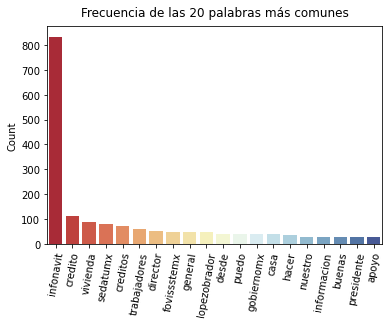

In [66]:
# Podemos visualizar la frecuencia de las palabras más comunes

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist.most_common(20))))

fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(x=most_common_20[:, 0],y=most_common_20[:, 1].astype('int'), ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 palabras más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

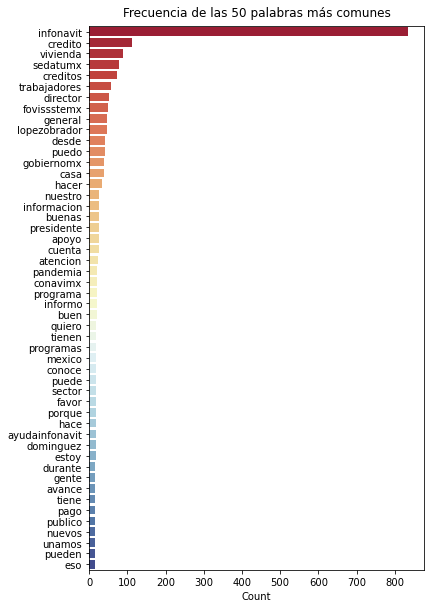

In [67]:
most_common_50 = np.array(list(map(lambda x: list(x), freq_dist.most_common(50))))

fig = plt.figure(figsize=(6, 10))
ax = fig.add_subplot()

sns.barplot(x=most_common_50[:, 1].astype('int'), y=most_common_50[:, 0], ax=ax, palette='RdYlBu', orient='h');
ax.set_title('Frecuencia de las 50 palabras más comunes', pad=10)
ax.set_xlabel('Count');

In [68]:
# Probemos sin palabras vacías

text = nltk.Text(all_words_except_stop_words)
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(text)))

freq_dist_bigrams

FreqDist({('director', 'general'): 30, ('general', 'infonavit'): 27, ('credito', 'infonavit'): 26, ('infonavit', 'fovissstemx'): 22, ('lopezobrador', 'infonavit'): 20, ('infonavit', 'buenas'): 19, ('sedatumx', 'infonavit'): 18, ('infonavit', 'infonavit'): 18, ('infonavit', 'puedo'): 18, ('programas', 'vivienda'): 16, ...})

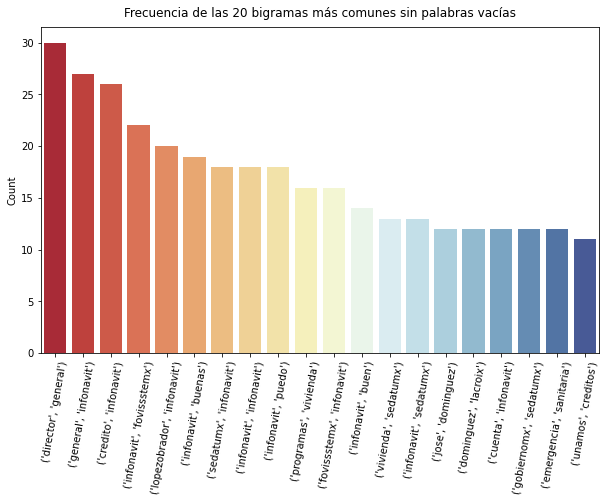

In [69]:
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(20))),dtype=object)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(x=most_common_20[:, 0], y=most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 bigramas más comunes sin palabras vacías', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

In [70]:
# No estamos restringidos solamente a bigramas

from nltk.util import ngrams

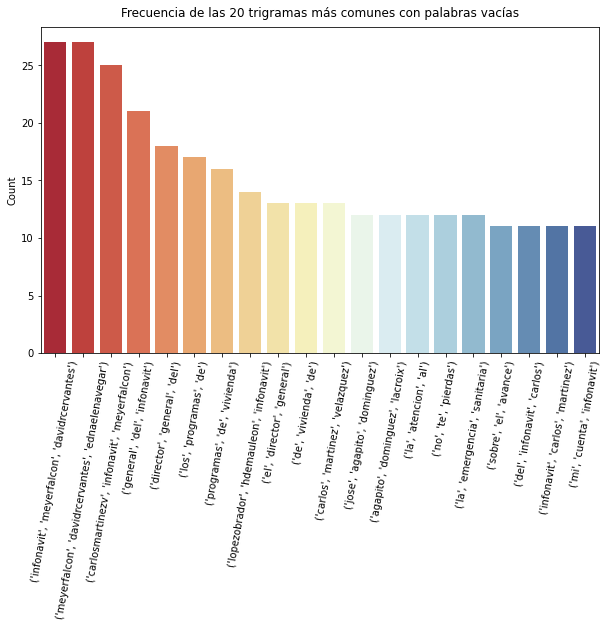

In [71]:
text = nltk.Text(all_words)
freq_dist_trigrams = nltk.FreqDist(list(ngrams(text, 3)))

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_trigrams.most_common(20))),dtype=object)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(x=most_common_20[:, 0], y=most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 trigramas más comunes con palabras vacías', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

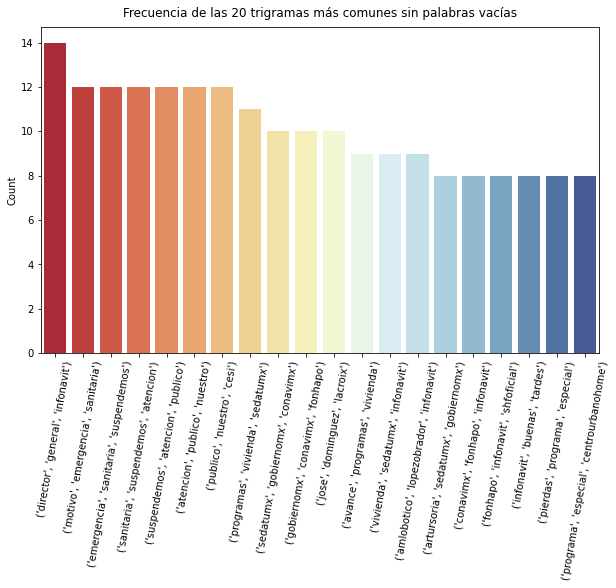

In [13]:
text = nltk.Text(all_words_except_stop_words)
freq_dist_trigrams = nltk.FreqDist(list(ngrams(text, 3)))

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_trigrams.most_common(20))),dtype=object)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(x=most_common_20[:, 0], y=most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 trigramas más comunes sin palabras vacías', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

In [72]:
# También podemos generar histogramas para visualizar la frecuencia de longitudes de palabras y oraciones

word_lengths = [len(w) for w in all_words_except_stop_words]

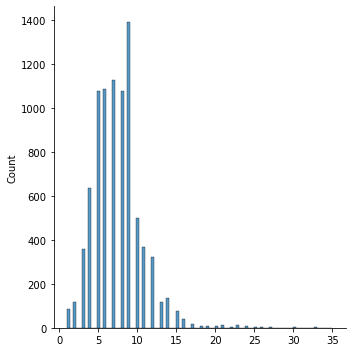

In [46]:
sns.displot(word_lengths, kde=False);

In [73]:
sentence_lengths = grouped_by_title.apply(lambda x: len(x))

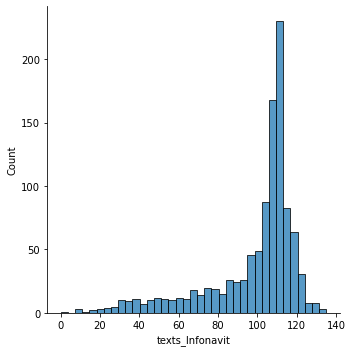

In [74]:
sns.displot(sentence_lengths, kde=False);

In [75]:
num_of_words = grouped_by_title.str.split(' ').str.len()

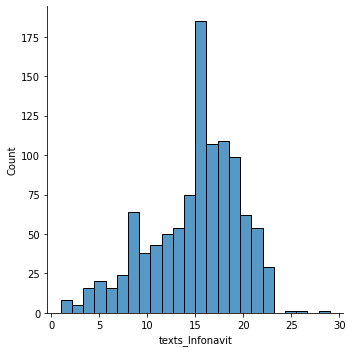

In [76]:
sns.displot(num_of_words, kde=False);

Para terminar, vamos a hacer una nube de palabras utilizando la librería `wordcloud`.

In [77]:
from wordcloud import WordCloud

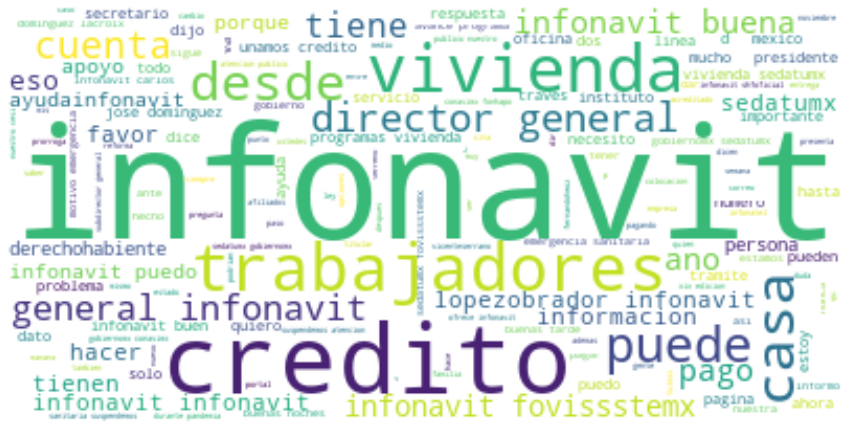

In [78]:
wordcloud = WordCloud(max_font_size=100, background_color="white").generate(' '.join(all_words_except_stop_words))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [79]:
tweets_Infonavit_clean = pd.DataFrame(all_words_except_stop_words, columns = ['texto'])
tweets_Infonavit_clean

,texto
0,imprescindible
1,guia
2,garcia
3,luna
4,jefefelipecalderonsus
...,...
9227,empresarial
9228,cae
9229,podran
9230,generar
